In [2]:
import pandas as pd

In [3]:
casas= pd.read_csv("datos_unidos_meses.csv")
salarios=pd.read_csv("spain_salary_distribution.csv")

In [4]:
#homogeneizar nombres columnas
casas.columns = casas.columns.str.strip().str.lower()
salarios.columns = salarios.columns.str.strip().str.lower()

In [5]:
#pone la columna year en solo el año 
casas['year'] = pd.to_datetime(casas['year'], dayfirst=True, errors='coerce')
casas['year'] = casas['year'].dt.year


In [6]:
#Asegurar que 'year' sea numérico
casas['year'] = pd.to_numeric(casas['year'], errors='coerce')
salarios['year'] = pd.to_numeric(salarios['year'], errors='coerce')

In [7]:
casas.head()

,codigo_comunidad,comunidad,name,year,precio,ipc,edad_media,mano_obra,precio_acero,precio_aluminio,precio_cemento,precio_ceramica,precio_cobre,precio_energía,precio_ligantes,precio_madera,num_hipotecas,num_inmigracion
0,1,andalucia,Andalucía,2003,995.0,72.838,37.951542,313.00,719.9,725.8,1349.9,1227.4,558.2,2017.0,1453.9,1507.4,69821,205704
1,1,andalucia,Andalucía,2003,1033.0,74.225,37.951542,317.54,730.7,728.3,1343.7,1227.2,527.6,1940.9,1525.7,1507.2,57326,213822
2,1,andalucia,Andalucía,2003,1094.0,73.579,38.049990,315.92,724.4,704.8,1324.6,1226.0,541.2,1865.3,1517.8,1512.6,52571,221941
3,1,andalucia,Andalucía,2003,1133.0,74.736,38.049990,319.96,717.4,705.4,1331.2,1224.4,590.5,1817.3,1445.2,1512.9,63411,230060
4,1,andalucia,Andalucía,2004,1186.0,74.391,38.146028,319.41,735.7,711.7,1342.7,1226.0,689.3,1773.3,1262.8,1517.9,79923,238178


In [8]:
salarios.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [9]:
casas["comunidad"].value_counts()

comunidad
andalucia                  77
aragon                     77
principado-asturias        77
pais-vasco                 77
melilla                    77
la-rioja                   77
islas-baleares             77
galicia                    77
extremadura                77
comunitat-valenciana       77
comunidad-madrid           77
comunidad-foral-navarra    77
ceuta                      77
catalunya                  77
castilla-mancha            77
castilla-leon              77
cantabria                  77
region-murcia              77
Name: count, dtype: int64

In [10]:
salarios["state"].value_counts()

state
nationwide                     180
Andalucía                      180
País Vasco                     180
Navarra, Comunidad Foral de    180
Murcia, Región de              180
Madrid, Comunidad de           180
Galicia                        180
Extremadura                    180
Comunitat Valenciana           180
Cataluña                       180
Castilla - La Mancha           180
Castilla y León                180
Cantabria                      180
Canarias                       180
Balears, Illes                 180
Asturias, Principado de        180
Aragón                         180
Rioja, La                      180
Name: count, dtype: int64

In [11]:
map_salarios = {
    'Andalucía': 'Andalucía',
    'Aragón': 'Aragón',
    'Cantabria': 'Cantabria',
    'Castilla y León': 'Castilla y León',
    'Castilla - La Mancha': 'Castilla La Mancha',
    'Cataluña': 'Cataluña',
    'Ceuta': 'Ceuta', 
    'Navarra, Comunidad Foral de': 'Navarra',
    'Madrid, Comunidad de': 'Madrid',
    'Comunitat Valenciana': 'Comunitat Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Balears, Illes': 'Islas Baleares',
    'Canarias': 'Canarias',
    'Rioja, La': 'La Rioja',
    'País Vasco': 'País Vasco',
    'Murcia, Región de': 'Murcia',
    'Asturias, Principado de': 'Asturias',
    'Melilla': 'Melilla',
}

salarios['state'] = salarios['state'].replace(map_salarios)


In [12]:
map_casas = {
    'andalucia': 'Andalucía',
    'aragon': 'Aragón',
    'cantabria': 'Cantabria',
    'castilla-leon' : 'Castilla y León',
    'castilla-mancha': 'Castilla La Mancha',
    'catalunya': 'Cataluña',
    'ceuta': 'Ceuta', 
    'comunidad-foral-navarra': 'Navarra',
    'comunidad-madrid': 'Madrid',
    'comunitat-valenciana': 'Comunitat Valenciana',
    'extremadura': 'Extremadura',
    'galicia': 'Galicia',
    'islas-baleares': 'Islas Baleares',
    'Canarias': 'Canarias',
    'la-rioja': 'La Rioja',
    'pais-vasco': 'País Vasco',
    'region-murcia': 'Murcia',
    'principado-asturias': 'Asturias',
    'melilla': 'Melilla'
}

casas["comunidad"] = casas["comunidad"].replace(map_casas)

In [13]:
print(salarios["state"].value_counts().sort_index())

state
Andalucía               180
Aragón                  180
Asturias                180
Canarias                180
Cantabria               180
Castilla La Mancha      180
Castilla y León         180
Cataluña                180
Comunitat Valenciana    180
Extremadura             180
Galicia                 180
Islas Baleares          180
La Rioja                180
Madrid                  180
Murcia                  180
Navarra                 180
País Vasco              180
nationwide              180
Name: count, dtype: int64


In [14]:
print(casas["comunidad"].value_counts().sort_index())

comunidad
Andalucía               77
Aragón                  77
Asturias                77
Cantabria               77
Castilla La Mancha      77
Castilla y León         77
Cataluña                77
Ceuta                   77
Comunitat Valenciana    77
Extremadura             77
Galicia                 77
Islas Baleares          77
La Rioja                77
Madrid                  77
Melilla                 77
Murcia                  77
Navarra                 77
País Vasco              77
Name: count, dtype: int64


In [15]:
salarios = salarios.rename(columns={'state': 'comunidad'})

In [16]:
salarios = salarios[salarios['comunidad'] != 'nationwide']

In [17]:
salarios.head(10)

,year,comunidad,gender,statistic,gross_income_euros
180,2017,Andalucía,both,mean,21404.28
181,2016,Andalucía,both,mean,21268.41
182,2015,Andalucía,both,mean,21381.03
183,2014,Andalucía,both,mean,20840.30
184,2013,Andalucía,both,mean,20782.03
185,2012,Andalucía,both,mean,20891.63
186,2011,Andalucía,both,mean,21350.98
187,2010,Andalucía,both,mean,20964.36
188,2009,Andalucía,both,mean,20906.33
189,2008,Andalucía,both,mean,20138.56


In [18]:
casas.head()

,codigo_comunidad,comunidad,name,year,precio,ipc,edad_media,mano_obra,precio_acero,precio_aluminio,precio_cemento,precio_ceramica,precio_cobre,precio_energía,precio_ligantes,precio_madera,num_hipotecas,num_inmigracion
0,1,Andalucía,Andalucía,2003,995.0,72.838,37.951542,313.00,719.9,725.8,1349.9,1227.4,558.2,2017.0,1453.9,1507.4,69821,205704
1,1,Andalucía,Andalucía,2003,1033.0,74.225,37.951542,317.54,730.7,728.3,1343.7,1227.2,527.6,1940.9,1525.7,1507.2,57326,213822
2,1,Andalucía,Andalucía,2003,1094.0,73.579,38.049990,315.92,724.4,704.8,1324.6,1226.0,541.2,1865.3,1517.8,1512.6,52571,221941
3,1,Andalucía,Andalucía,2003,1133.0,74.736,38.049990,319.96,717.4,705.4,1331.2,1224.4,590.5,1817.3,1445.2,1512.9,63411,230060
4,1,Andalucía,Andalucía,2004,1186.0,74.391,38.146028,319.41,735.7,711.7,1342.7,1226.0,689.3,1773.3,1262.8,1517.9,79923,238178


In [19]:
df = pd.merge(
    casas,
    salarios,
    on=['comunidad', 'year'],
    how='left'
)

In [20]:
df.head()

,codigo_comunidad,comunidad,name,year,precio,ipc,edad_media,mano_obra,precio_acero,precio_aluminio,...,precio_ceramica,precio_cobre,precio_energía,precio_ligantes,precio_madera,num_hipotecas,num_inmigracion,gender,statistic,gross_income_euros
0,1,Andalucía,Andalucía,2003,995.0,72.838,37.951542,313.00,719.9,725.8,...,1227.4,558.2,2017.0,1453.9,1507.4,69821,205704,NaN,NaN,NaN
1,1,Andalucía,Andalucía,2003,1033.0,74.225,37.951542,317.54,730.7,728.3,...,1227.2,527.6,1940.9,1525.7,1507.2,57326,213822,NaN,NaN,NaN
2,1,Andalucía,Andalucía,2003,1094.0,73.579,38.049990,315.92,724.4,704.8,...,1226.0,541.2,1865.3,1517.8,1512.6,52571,221941,NaN,NaN,NaN
3,1,Andalucía,Andalucía,2003,1133.0,74.736,38.049990,319.96,717.4,705.4,...,1224.4,590.5,1817.3,1445.2,1512.9,63411,230060,NaN,NaN,NaN
4,1,Andalucía,Andalucía,2004,1186.0,74.391,38.146028,319.41,735.7,711.7,...,1226.0,689.3,1773.3,1262.8,1517.9,79923,238178,NaN,NaN,NaN


In [21]:
materiales = ['precio_acero', 'precio_aluminio', 'precio_cemento',
              'precio_ceramica', 'precio_cobre', 'precio_energía',
              'precio_ligantes', 'precio_madera']

df['precio_materiales'] = df[materiales].sum(axis=1)
df = df.drop(columns=materiales)

In [22]:
df.head()

,codigo_comunidad,comunidad,name,year,precio,ipc,edad_media,mano_obra,num_hipotecas,num_inmigracion,gender,statistic,gross_income_euros,precio_materiales
0,1,Andalucía,Andalucía,2003,995.0,72.838,37.951542,313.00,69821,205704,NaN,NaN,NaN,9559.5
1,1,Andalucía,Andalucía,2003,1033.0,74.225,37.951542,317.54,57326,213822,NaN,NaN,NaN,9531.3
2,1,Andalucía,Andalucía,2003,1094.0,73.579,38.049990,315.92,52571,221941,NaN,NaN,NaN,9416.7
3,1,Andalucía,Andalucía,2003,1133.0,74.736,38.049990,319.96,63411,230060,NaN,NaN,NaN,9344.3
4,1,Andalucía,Andalucía,2004,1186.0,74.391,38.146028,319.41,79923,238178,NaN,NaN,NaN,9259.4


In [23]:
media_andalucia_2008 = df.loc[
    (df["comunidad"] == "Andalucía") & (df["year"] == 2008),
    "precio"
].mean()

print(f"El precio medio de la vivienda en Andalucía en 2008 fue de {media_andalucia_2008:.2f} €/m²")


El precio medio de la vivienda en Andalucía en 2008 fue de 1944.00 €/m²


In [24]:
# MEDIA 2008
df_2008 = df[df['year'] == 2008]


media_2008 = df_2008.groupby('comunidad')['precio'].mean()


print(media_2008)

comunidad
Andalucía               1944.00
Aragón                  1931.50
Asturias                1745.75
Cantabria               2075.50
Castilla La Mancha      1562.25
Castilla y León         1560.50
Cataluña                2796.25
Ceuta                   1916.50
Comunitat Valenciana    1848.50
Extremadura             1066.00
Galicia                 1495.25
Islas Baleares          2718.50
La Rioja                1662.50
Madrid                  3221.75
Melilla                 1726.25
Murcia                  1730.50
Navarra                 1994.25
País Vasco              3131.50
Name: precio, dtype: float64


In [25]:
# IPC 2008
df_2008 = df[df['year'] == 2008]


media_2008 = df_2008.groupby('comunidad')['ipc'].mean()


print(media_2008)

comunidad
Andalucía               87.06175
Aragón                  86.95525
Asturias                86.99375
Cantabria               85.79300
Castilla La Mancha      87.20950
Castilla y León         86.07500
Cataluña                84.04600
Ceuta                   89.45725
Comunitat Valenciana    86.86225
Extremadura             87.51550
Galicia                 86.14425
Islas Baleares          85.71900
La Rioja                86.45025
Madrid                  86.59825
Melilla                 88.65675
Murcia                  87.76375
Navarra                 86.85425
País Vasco              84.97075
Name: ipc, dtype: float64


In [85]:
# andalucia 2008
salario_andalucia_2008 = df.loc[
    (df['comunidad'] == 'Andalucía') & (df['year'] == 2008),
    'gross_income_euros'
].mean()


print(f"Salario medio en Andalucía en 2008: {salario_andalucia_2008:.2f} €")


Salario medio en Andalucía en 2008: 19483.93 €


In [87]:
#2017
df_2017 = df[df['year'] == 2017]


salario_medio_2017 = df_2017['gross_income_euros'].mean()

print(f"Salario medio en 2017: {salario_medio_2017:.2f} €")


Salario medio en 2017: 22368.04 €


In [88]:
#2003
df_2003 = df[df['year'] == 2003]


precio_medio_2003 = df_2003['precio'].mean()

print(f"Precio medio de la vivienda en 2003: {precio_medio_2003:.2f} €")


Precio medio de la vivienda en 2003: 1179.44 €


In [90]:
#2015
df_2015 = df[df['year'] == 2015]


salario_medio_2015 = df_2015['gross_income_euros'].mean()

print(f"Salario medio en 2015: {salario_medio_2015:.2f} €")


Salario medio en 2015: 21825.13 €


In [91]:
# 2015
df_2015 = df[df['year'] == 2015]


precio_medio_2015 = df_2015['precio'].mean()

print(f"Precio medio de la vivienda en 2015: {precio_medio_2015:.2f} €")


Precio medio de la vivienda en 2015: 1273.01 €


In [33]:
ipc_anual = df.groupby('year')['ipc'].mean().reset_index()
print(ipc_anual)

    year         ipc
0   2003   73.528667
1   2004   75.730208
2   2005   78.186806
3   2006   81.035667
4   2007   83.136917
5   2008   86.456341
6   2009   86.060173
7   2010   87.511741
8   2011   90.445758
9   2012   92.647027
10  2013   94.012287
11  2014   93.990297
12  2015   93.301580
13  2016   92.984566
14  2017   94.954972
15  2018   96.437347
16  2019   97.110653
17  2020   96.806083
18  2021   99.583625
19  2022  103.596556


In [109]:

df_comunidades = df[df['comunidad'] != 'nationwide']


precio_medio_nacional = df_comunidades['precio'].mean()
ipc_medio_nacional = df_comunidades['ipc'].mean()
salario_medio_nacional = df_comunidades['gross_income_euros'].mean()


print(f"Precio medio nacional: {precio_medio_nacional:.2f} €")
print(f"IPC medio nacional: {ipc_medio_nacional:.2f}")
print(f"Salario medio nacional: {salario_medio_nacional:.2f} €")


Precio medio nacional: 1570.64 €
IPC medio nacional: 91.02
Salario medio nacional: 21461.68 €


In [113]:
def resumen_2015(df):
   
    # Ejemplo año 2015
    df_2015 = df[df["year"] == 2015]
    
    
    mediana_salario = df_2015["gross_income_euros"].median()
    media_precio = df_2015["precio"].mean()
    
    
    print("📊 Resumen del año 2015:")
    print(f"   - Mediana del salario: {mediana_salario:.2f} €")
    print(f"   - Media del precio de la vivienda: {media_precio:.2f} €")

# Ejecutar
resumen_2015(df)

📊 Resumen del año 2015:
   - Mediana del salario: 20526.47 €
   - Media del precio de la vivienda: 1273.01 €


In [107]:
# Filtro directo
fila_andalucia_2015 = salarios[
    (salarios["year"] == 2015) &
    (salarios["comunidad"] == "Andalucía") &
    (salarios["statistic"] == "median") &
    (salarios["gender"] == "both")
]

# Mostrar la fila resultante
print(fila_andalucia_2015)

    year  comunidad gender statistic  gross_income_euros
32  2015  Andalucía   both    median             18101.7


In [98]:
ine = pd.read_excel("ine.xlsx") 

In [99]:
ine.head()

,year,comunidad,gender,statistic,gross_income_euros
0,2023,España,both,mean,28049.94
1,2022,España,both,mean,26948.87
2,2021,España,both,mean,25896.82
3,2020,España,both,mean,25165.51
4,2019,España,both,mean,24395.98


In [101]:
salarios = pd.concat([salarios, ine], ignore_index=True)

In [102]:
salarios.head()

,year,comunidad,gender,statistic,gross_income_euros
0,2017,Andalucía,both,mean,21404.28
1,2016,Andalucía,both,mean,21268.41
2,2015,Andalucía,both,mean,21381.03
3,2014,Andalucía,both,mean,20840.30
4,2013,Andalucía,both,mean,20782.03


In [103]:
def consultar_datos_completos(df_salarios, df_vivienda):
    comunidad = input("Introduce la comunidad (o 'España' para media nacional): ").strip()
    year = int(input("Introduce el año: ").strip())
    tipo = input("¿Qué tipo de dato quieres consultar? (mean / median): ").strip().lower()

    # Salario
    salario = df_salarios[
        (df_salarios["comunidad"].str.lower() == comunidad.lower()) &
        (df_salarios["year"] == year) &
        (df_salarios["statistic"].str.lower() == tipo)
    ]["gross_income_euros"].mean()

    # Vivienda e IPC 
    if comunidad.lower() == "españa":
        # Promedia todas las comunidades para el año
        precio = df_vivienda[df_vivienda["year"] == year]["precio"].mean()
        ipc = df_vivienda[df_vivienda["year"] == year]["ipc"].mean()
    else:
        precio = df_vivienda[
            (df_vivienda["comunidad"].str.lower() == comunidad.lower()) &
            (df_vivienda["year"] == year)
        ]["precio"].mean()

        ipc = df_vivienda[
            (df_vivienda["comunidad"].str.lower() == comunidad.lower()) &
            (df_vivienda["year"] == year)
        ]["ipc"].mean()

    # -Resultados
    if pd.isna(salario) and pd.isna(precio) and pd.isna(ipc):
        print(f"\n⚠️ No hay datos disponibles para {comunidad} en {year}.")
    else:
        print(f"\n📊 Datos para {comunidad} en {year} ({tipo}):")
        print(f"💰 Salario ({tipo}): {salario:,.2f} €" if not pd.isna(salario) else "💰 Salario: No disponible")
        print(f"🏠 Precio medio vivienda: {precio:,.2f} €/m²" if not pd.isna(precio) else "🏠 Precio: No disponible")
        print(f"📈 IPC medio: {ipc:.2f}" if not pd.isna(ipc) else "📈 IPC: No disponible")


In [104]:
consultar_datos_completos(salarios, casas)


📊 Datos para Andalucía en 2022 (median):
💰 Salario (median): 19,883.60 €
🏠 Precio medio vivienda: 1,367.00 €/m²
📈 IPC medio: 103.52


In [ ]:
consultar_datos_completos(salarios, casas)


📊 Datos para Madrid en 2015 (median):
💰 Salario (median): 21,310.54 €
🏠 Precio medio vivienda: 1,817.50 €/m²
📈 IPC medio: 93.59


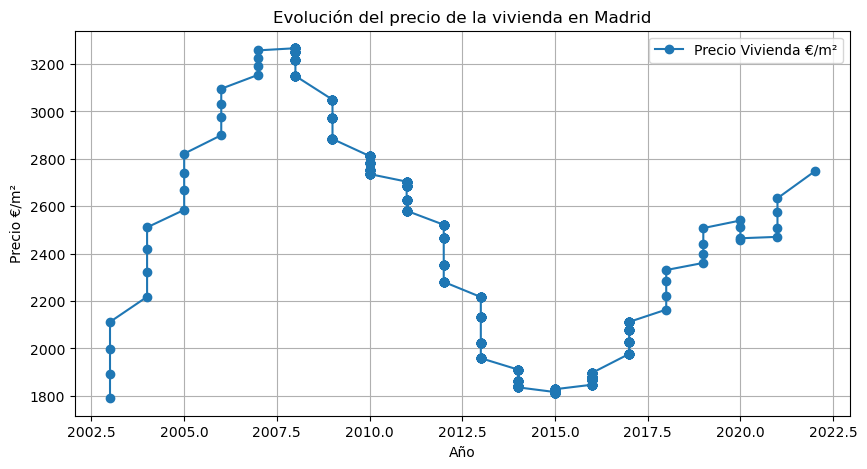

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu dataframe con todos los datos ya limpios
# columnas: 'year', 'comunidad', 'precio', 'gross_income_euros'

# Filtramos para la comunidad que quieras (por ejemplo Madrid)
comunidad = "Madrid"
df_com = df[df["comunidad"] == comunidad]

# Gráfico de evolución de precios de la vivienda
plt.figure(figsize=(10,5))
plt.plot(df_com["year"], df_com["precio"], marker='o', label='Precio Vivienda €/m²')
plt.title(f'Evolución del precio de la vivienda en {comunidad}')
plt.xlabel('Año')
plt.ylabel('Precio €/m²')
plt.grid(True)
plt.legend()
plt.show()



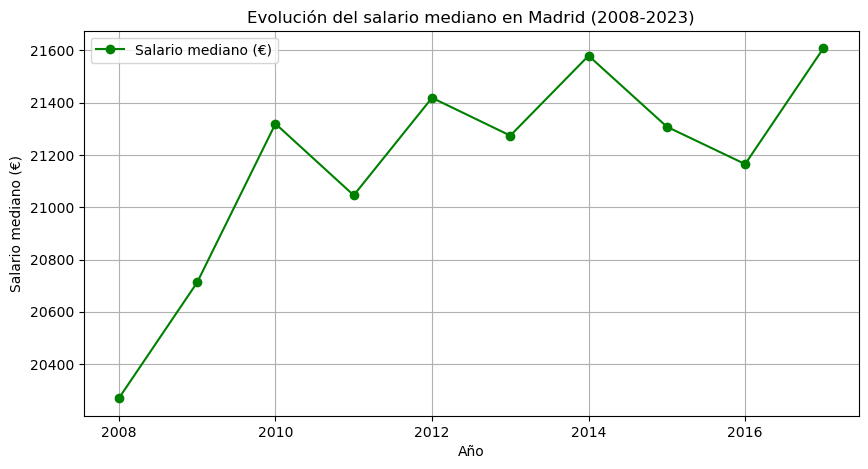

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo mediana para la comunidad
comunidad = "Madrid"
df_median = df[(df["comunidad"] == comunidad) & (df["statistic"] == "median")]

# Agrupar por año y calcular la mediana de gross_income_euros
df_annual = df_median.groupby("year")["gross_income_euros"].median().reset_index()

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(df_annual["year"], df_annual["gross_income_euros"], marker='o', color='green', label='Salario mediano (€)')
plt.title(f'Evolución del salario mediano en {comunidad} (2008-2023)')
plt.xlabel('Año')
plt.ylabel('Salario mediano (€)')
plt.grid(True)
plt.legend()
plt.show()


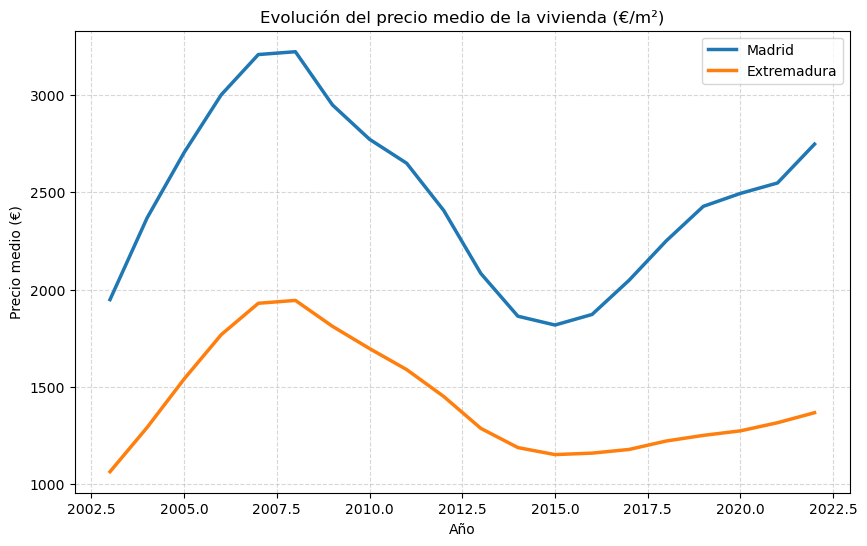

In [49]:
import matplotlib.pyplot as plt

# Filtramos por comunidades
madrid = casas[casas["comunidad"] == "Madrid"].groupby("year")["precio"].mean().reset_index()
extremadura = casas[casas["comunidad"] == "Andalucía"].groupby("year")["precio"].mean().reset_index()

# Gráfico comparativo
plt.figure(figsize=(10,6))
plt.plot(madrid["year"], madrid["precio"], label="Madrid", linewidth=2.5)
plt.plot(extremadura["year"], extremadura["precio"], label="Extremadura", linewidth=2.5)

# Estilo del gráfico
plt.title("Evolución del precio medio de la vivienda (€/m²)")
plt.xlabel("Año")
plt.ylabel("Precio medio (€)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar gráfico
plt.show()


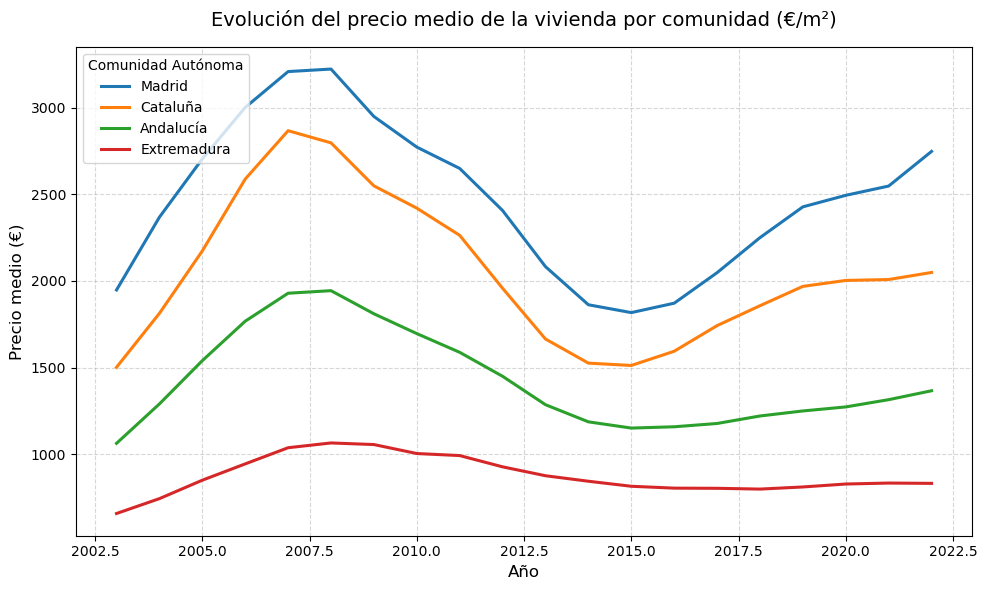

In [50]:
import matplotlib.pyplot as plt

# Seleccionamos las comunidades que queremos comparar
comunidades = ["Madrid", "Cataluña", "Andalucía", "Extremadura"]

# Filtramos los datos
df_comparativa = casas[casas["comunidad"].isin(comunidades)]

# Calculamos la media anual del precio por comunidad
df_comparativa = df_comparativa.groupby(["year", "comunidad"])["precio"].mean().reset_index()

# Graficamos
plt.figure(figsize=(10,6))

for comunidad in comunidades:
    datos = df_comparativa[df_comparativa["comunidad"] == comunidad]
    plt.plot(datos["year"], datos["precio"], label=comunidad, linewidth=2.2)

# Estilo del gráfico
plt.title("Evolución del precio medio de la vivienda por comunidad (€/m²)", fontsize=14, pad=15)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio medio (€)", fontsize=12)
plt.legend(title="Comunidad Autónoma", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


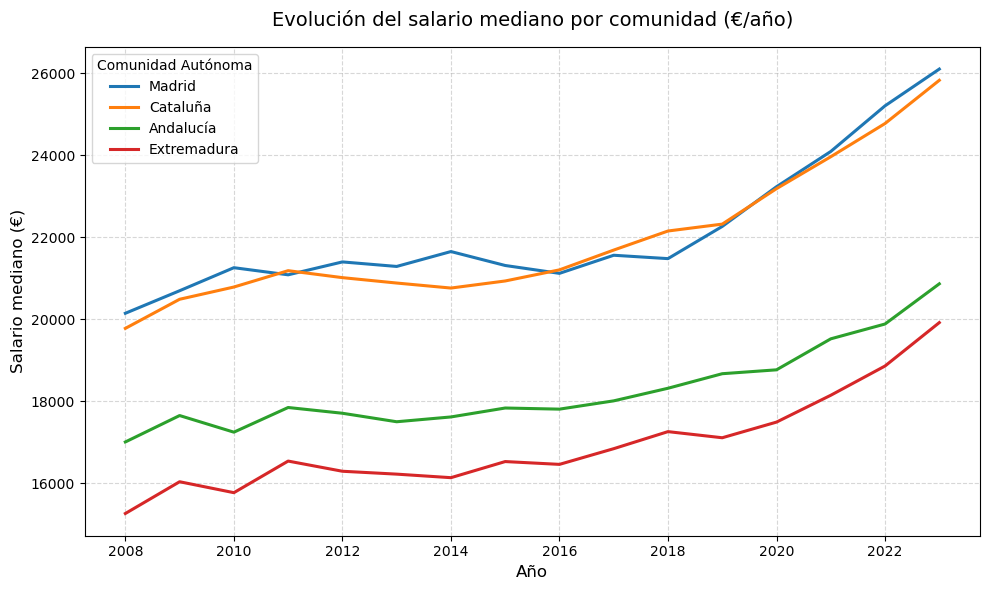

In [51]:
import matplotlib.pyplot as plt

# Seleccionamos las comunidades
comunidades = ["Madrid", "Cataluña", "Andalucía", "Extremadura"]

# Filtramos solo los datos de mediana (median)
salarios_mediana = salarios[salarios["statistic"] == "median"]

# Filtramos por las comunidades deseadas
salarios_comparativa = salarios_mediana[salarios_mediana["comunidad"].isin(comunidades)]

# Agrupamos por año y comunidad (por si hay duplicados)
salarios_comparativa = salarios_comparativa.groupby(["year", "comunidad"])["gross_income_euros"].mean().reset_index()

# Graficamos
plt.figure(figsize=(10,6))

for comunidad in comunidades:
    datos = salarios_comparativa[salarios_comparativa["comunidad"] == comunidad]
    plt.plot(datos["year"], datos["gross_income_euros"], label=comunidad, linewidth=2.2)

# Estilo
plt.title("Evolución del salario mediano por comunidad (€/año)", fontsize=14, pad=15)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Salario mediano (€)", fontsize=12)
plt.legend(title="Comunidad Autónoma", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


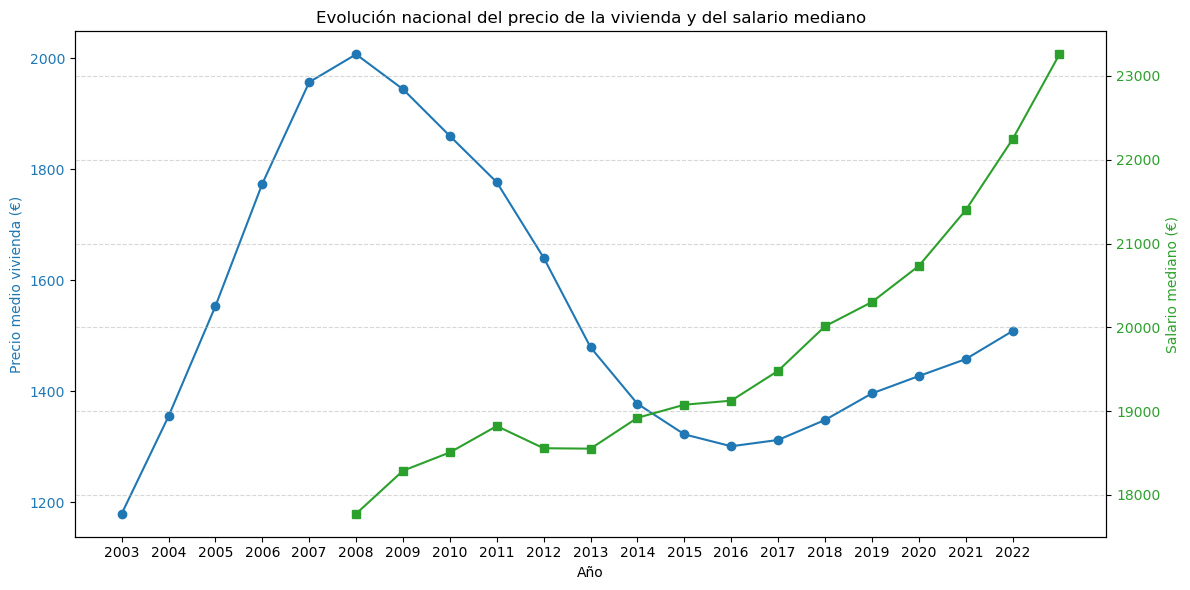

In [114]:
import matplotlib.pyplot as plt

# === Asegurar que los años sean enteros ===
salarios["year"] = salarios["year"].astype(int)
casas["year"] = casas["year"].astype(int)

# === Precio medio nacional por año ===
df_vivienda_nacional = casas.groupby("year")["precio"].mean().reset_index()

# === Salario mediano nacional por año ===
df_salario_nacional = salarios[salarios["statistic"] == "median"]
df_salario_nacional = df_salario_nacional.groupby("year")["gross_income_euros"].mean().reset_index()

# === Gráfico combinado ===
fig, ax1 = plt.subplots(figsize=(12,6))

# Eje 1: precios de vivienda
color_precio = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Precio medio vivienda (€)', color=color_precio)
ax1.plot(df_vivienda_nacional["year"], df_vivienda_nacional["precio"], marker='o', color=color_precio, label='Vivienda')
ax1.tick_params(axis='y', labelcolor=color_precio)

# Eje 2: salarios medianos
ax2 = ax1.twinx()
color_salario = 'tab:green'
ax2.set_ylabel('Salario mediano (€)', color=color_salario)
ax2.plot(df_salario_nacional["year"], df_salario_nacional["gross_income_euros"], marker='s', color=color_salario, label='Salario mediano')
ax2.tick_params(axis='y', labelcolor=color_salario)


ax1.set_xticks(df_vivienda_nacional["year"])
ax1.set_xticklabels(df_vivienda_nacional["year"].astype(str))

# === Estilo general ===
plt.title('Evolución nacional del precio de la vivienda y del salario mediano')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [68]:
# Ordenamos los datos por comunidad y año
df_crecimiento = casas[['comunidad', 'year', 'num_inmigracion']].sort_values(['comunidad', 'year'])

# Calculamos el crecimiento acumulado respecto a 2003 usando transform
df_crecimiento['crec_acumulada_inmigracion'] = df_crecimiento.groupby('comunidad')['num_inmigracion'].transform(lambda x: (x / x.iloc[0] - 1) * 100)

# Media nacional anual del crecimiento acumulado
df_media_nacional_acum = df_crecimiento.groupby('year')['crec_acumulada_inmigracion'].mean().round(2).reset_index()

print(df_media_nacional_acum)


    year  crec_acumulada_inmigracion
0   2003                        5.98
1   2004                       25.19
2   2005                       48.23
3   2006                       69.54
4   2007                       99.89
5   2008                      134.31
6   2009                      150.48
7   2010                      157.92
8   2011                      163.04
9   2012                      160.43
10  2013                      141.47
11  2014                      114.09
12  2015                       96.55
13  2016                       88.18
14  2017                       85.65
15  2018                       91.90
16  2019                      104.14
17  2020                      113.53
18  2021                      113.72
19  2022                      114.59


In [118]:
df["num_inmigracion"].value_counts()

num_inmigracion
30565     36
30886     36
26811     19
618901    18
703159    18
          ..
44825      1
45845      1
45856      1
45866      1
111325     1
Name: count, Length: 1370, dtype: int64

In [72]:
# Ordenamos los datos por comunidad y año
df_crecimiento = casas[['comunidad', 'year', 'num_inmigracion', 'num_hipotecas']].sort_values(['comunidad', 'year'])

# Calculamos crecimiento acumulado respecto a 2003 para cada comunidad
df_crecimiento['crec_acumulada_inmigracion'] = (
    df_crecimiento.groupby('comunidad')['num_inmigracion']
    .transform(lambda x: (x / x.iloc[0] - 1) * 100)
)

df_crecimiento['crec_acumulada_hipotecas'] = (
    df_crecimiento.groupby('comunidad')['num_hipotecas']
    .transform(lambda x: (x / x.iloc[0] - 1) * 100)
)


df_media_nacional_acum = (
    df_crecimiento.groupby('year')[['crec_acumulada_inmigracion', 'crec_acumulada_hipotecas']]
    .mean()
    .round(2)
    .reset_index()
)

df_media_nacional_acum

,year,crec_acumulada_inmigracion,crec_acumulada_hipotecas
0,2003,5.98,0.75
1,2004,25.19,23.95
2,2005,48.23,32.26
3,2006,69.54,45.71
4,2007,99.89,45.37
5,2008,134.31,10.39
6,2009,150.48,-8.51
7,2010,157.92,-11.89
8,2011,163.04,-42.31
9,2012,160.43,-58.84


In [71]:
media_hipotecas = (
    casas[casas['year'].isin([2003, 2022])]
    .groupby('year')['num_hipotecas']
    .mean()
    .round(2)
)

print(media_hipotecas)

year
2003    17394.10
2022     8084.06
Name: num_hipotecas, dtype: float64
